In [1]:
import torch
import os
import numpy as np
from sklearn.manifold import Isomap
import argparse
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import pandas as pd
from scipy.stats import skew #
sns.set(style='ticks')

In [2]:
### the isomap data can be loaded from the Zenodo page: https://zenodo.org/uploads/14583107

In [3]:
features_cnn = np.load('../../data/isomap_plot_data/isomap_data_DA/cnn_latent.npy')
features_cnn_noise = np.load('../../data/isomap_plot_data/isomap_data_DA/cnn_noise_latent.npy')
y_pred_cnn = np.load('../../data/isomap_plot_data/isomap_data_DA/cnn_preds.npy')
y_pred_cnn_noise = np.load('../../data/isomap_plot_data/isomap_data_DA/cnn_noise_preds.npy')

features_d4 = np.load('../../data/isomap_plot_data/isomap_data_DA/d4_latent.npy')
features_d4_noise = np.load('../../data/isomap_plot_data/isomap_data_DA/d4_noise_latent.npy')
y_pred_d4 = np.load('../../data/isomap_plot_data/isomap_data_DA/d4_preds.npy')
y_pred_d4_noise = np.load('../../data/isomap_plot_data/isomap_data_DA/d4_noise_preds.npy')

features_cnn_no_DA = np.load('../../data/isomap_plot_data/isomap_data_CE/cnn_latent.npy')
features_cnn_noise_no_DA = np.load('../../data/isomap_plot_data/isomap_data_CE/cnn_noise_latent.npy')
y_pred_cnn_no_DA = np.load('../../data/isomap_plot_data/isomap_data_CE/cnn_preds.npy')
y_pred_cnn_noise_no_DA = np.load('../../data/isomap_plot_data/isomap_data_CE/cnn_noise_preds.npy')

features_d4_no_DA = np.load('../../data/isomap_plot_data/isomap_data_CE/d4_latent.npy')
features_d4_noise_no_DA = np.load('../../data/isomap_plot_data/isomap_data_CE/d4_noise_latent.npy')
y_pred_d4_no_DA = np.load('../../data/isomap_plot_data/isomap_data_CE/d4_preds.npy')
y_pred_d4_noise_no_DA = np.load('../../data/isomap_plot_data/isomap_data_CE/d4_noise_preds.npy')

In [4]:
combined_features_d4 = np.concatenate((features_d4, features_d4_noise), axis=0)
combined_y_pred_d4 = np.concatenate((y_pred_d4, y_pred_d4_noise), axis=0)

isomap = Isomap(n_components=2)
isomap_embedding = isomap.fit_transform(combined_features_d4)

num_normal = len(combined_features_d4) // 2
embedding_normal_d4 = isomap_embedding[:num_normal]
embedding_noisy_d4 = isomap_embedding[num_normal:]

In [5]:
combined_features_d4_no_DA = np.concatenate((features_d4_no_DA, features_d4_noise_no_DA), axis=0)
combined_y_pred_d4_no_DA = np.concatenate((y_pred_d4_no_DA, y_pred_d4_noise_no_DA), axis=0)

isomap = Isomap(n_components=2)
isomap_embedding = isomap.fit_transform(combined_features_d4_no_DA)

num_normal = len(combined_features_d4_no_DA) // 2
embedding_normal_d4_no_DA = isomap_embedding[:num_normal]
embedding_noisy_d4_no_DA = isomap_embedding[num_normal:]

In [6]:
combined_features_cnn = np.concatenate((features_cnn, features_cnn_noise), axis=0)
combined_y_pred_cnn = np.concatenate((y_pred_cnn, y_pred_cnn_noise), axis=0)

isomap = Isomap(n_components=2)
isomap_embedding = isomap.fit_transform(combined_features_cnn);

num_normal = len(combined_features_cnn) // 2
embedding_normal_cnn = isomap_embedding[:num_normal]
embedding_noisy_cnn = isomap_embedding[num_normal:]

In [7]:
combined_features_cnn_no_DA = np.concatenate((features_cnn_no_DA, features_cnn_noise_no_DA), axis=0)
combined_y_pred_cnn_no_DA = np.concatenate((y_pred_cnn_no_DA, y_pred_cnn_noise_no_DA), axis=0)

isomap = Isomap(n_components=2)
isomap_embedding = isomap.fit_transform(combined_features_cnn_no_DA);

num_normal = len(combined_features_cnn) // 2
embedding_normal_cnn_no_DA = isomap_embedding[:num_normal]
embedding_noisy_cnn_no_DA = isomap_embedding[num_normal:]

In [13]:
normal_centroids_cnn, noisy_centroids_cnn = [], []
normal_centroids_d4, noisy_centroids_d4 = [], []
normal_centroids_cnn_no_DA, noisy_centroids_cnn_no_DA = [], []
normal_centroids_d4_no_DA, noisy_centroids_d4_no_DA = [], []
for i in range(10):
    cluster = embedding_normal_cnn[combined_y_pred_cnn[:num_normal] == i]
    centroid = np.mean(cluster, axis=0)
    normal_centroids_cnn.append(centroid)
    cluster = embedding_noisy_cnn[combined_y_pred_cnn[num_normal:] == i]
    centroid = np.mean(cluster, axis=0)
    noisy_centroids_cnn.append(centroid)
    cluster = embedding_normal_d4[combined_y_pred_d4[:num_normal] == i]
    centroid = np.mean(cluster, axis=0)
    normal_centroids_d4.append(centroid)
    cluster = embedding_noisy_d4[combined_y_pred_d4[num_normal:] == i]
    centroid = np.mean(cluster, axis=0)
    noisy_centroids_d4.append(centroid)
    cluster = embedding_normal_cnn_no_DA[combined_y_pred_cnn_no_DA[:num_normal] == i]
    centroid = np.mean(cluster, axis=0)
    normal_centroids_cnn_no_DA.append(centroid)
    cluster = embedding_noisy_cnn_no_DA[combined_y_pred_cnn_no_DA[num_normal:] == i]
    centroid = np.mean(cluster, axis=0)
    noisy_centroids_cnn_no_DA.append(centroid)
    cluster = embedding_normal_d4_no_DA[combined_y_pred_d4_no_DA[:num_normal] == i]
    centroid = np.mean(cluster, axis=0)
    normal_centroids_d4_no_DA.append(centroid)
    cluster = embedding_noisy_d4_no_DA[combined_y_pred_d4_no_DA[num_normal:] == i]
    centroid = np.mean(cluster, axis=0)
    noisy_centroids_d4_no_DA.append(centroid)
    

normal_centroids_cnn = np.array(normal_centroids_cnn)
noisy_centroids_cnn = np.array(noisy_centroids_cnn)
normal_centroids_d4 = np.array(normal_centroids_d4)
noisy_centroids_d4 = np.array(noisy_centroids_d4)
normal_centroids_cnn_no_DA = np.array(normal_centroids_cnn_no_DA)
noisy_centroids_cnn_no_DA = np.array(noisy_centroids_cnn_no_DA)
normal_centroids_d4_no_DA = np.array(normal_centroids_d4_no_DA)
noisy_centroids_d4_no_DA = np.array(noisy_centroids_d4_no_DA)

findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: Generic family 'serif' not found because none of the following families were found: Computer Modern
findfont: 

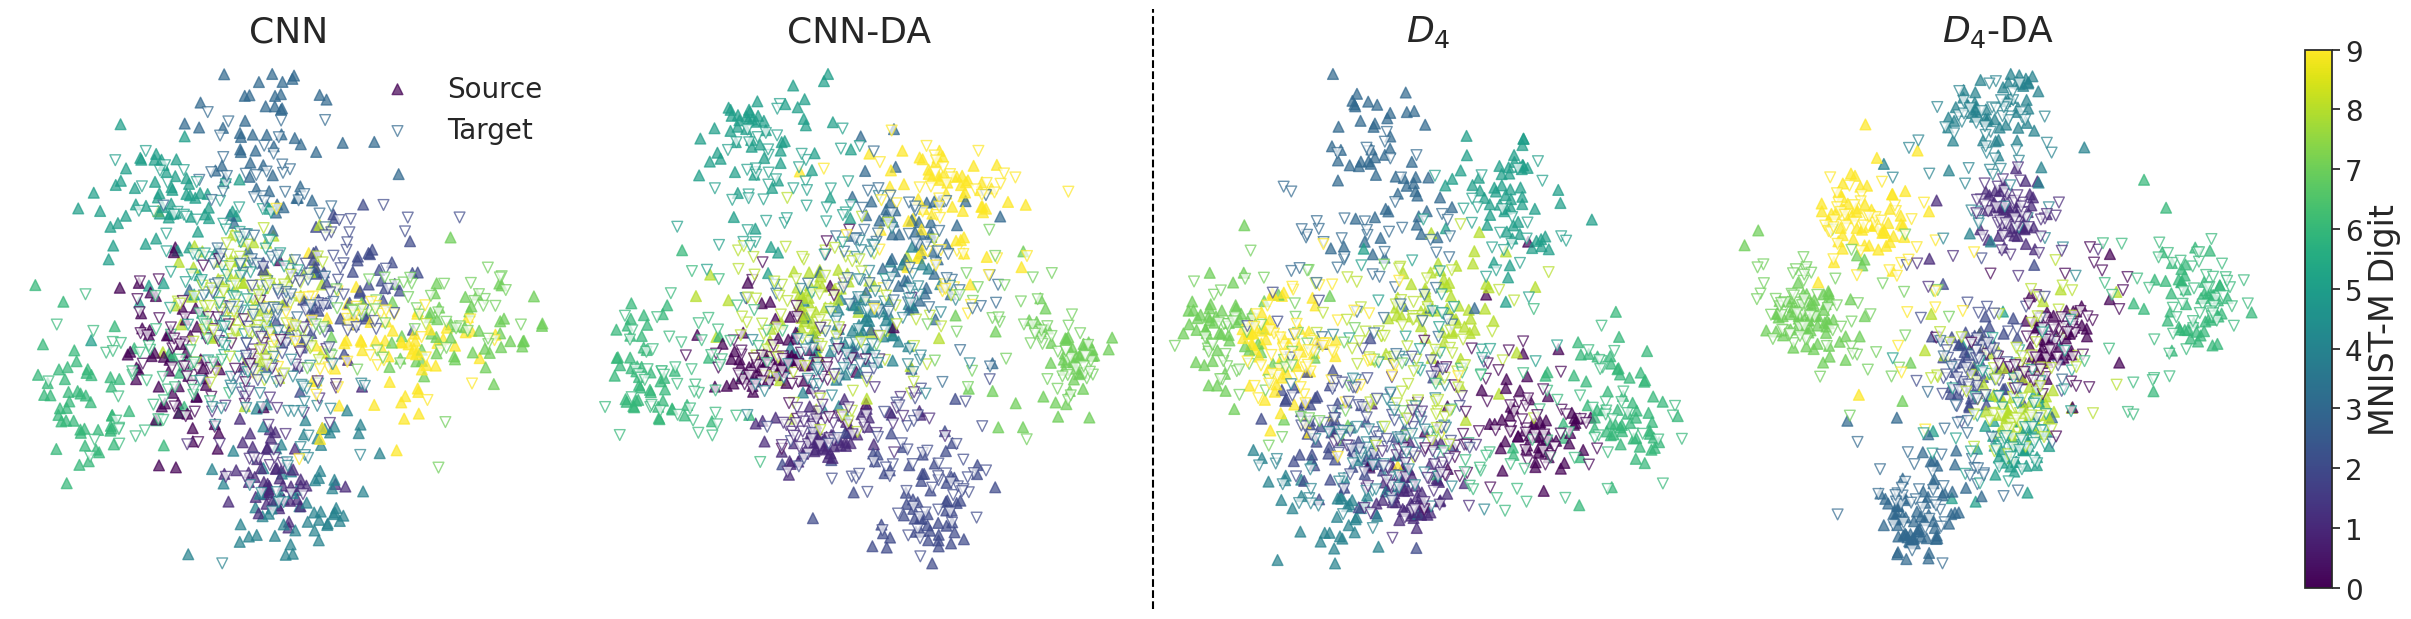

In [8]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": False,                  # Use LaTeX for text rendering
    "font.family": "serif",               # Use a serif font
    "font.serif": ["Computer Modern"],    # Match LaTeX default font          # Font size for y-axis ticks
})


# Number of points to plot
num_points_to_plot = 600  # Adjust as needed

# Function to sample a subset of points for plotting
def sample_points(data, labels, num_points):
    indices = np.random.choice(data.shape[0], size=min(num_points, data.shape[0]), replace=False)
    return data[indices], labels[indices]

size = 60
source_marker = '^'
target_marker = 'v'
fontsize = 26
# Define number of classes and their range
num_classes = 10  # 0 to 9
class_range = (0, num_classes - 1)  # Adjust if classes are 1 to 10

# Create a Normalize object for consistent scaling
norm = mpl.colors.Normalize(vmin=class_range[0], vmax=class_range[1])

# Create a figure with four subplots side by side
fig, axes = plt.subplots(1, 4, figsize=(24, 6), constrained_layout=True)

# CNN (no DA)
ax = axes[0]
sampled_normal, sampled_labels_normal = sample_points(embedding_normal_cnn_no_DA, combined_y_pred_cnn_no_DA[:num_normal], num_points_to_plot)
sampled_noisy, sampled_labels_noisy = sample_points(embedding_noisy_cnn_no_DA, combined_y_pred_cnn_no_DA[num_normal:], num_points_to_plot)
ax.scatter(
    sampled_normal[:, 0], sampled_normal[:, 1],
    c=sampled_labels_normal,
    cmap='viridis', norm=norm, edgecolors=None,
    marker=source_marker, s=size, alpha=0.7, label='Source'
)
noisy_colors = plt.cm.viridis(norm(sampled_labels_noisy))
ax.scatter(
    sampled_noisy[:, 0], sampled_noisy[:, 1],
    facecolors='white',
    edgecolors=noisy_colors,
    marker=target_marker, s=size, alpha=0.7, label='Target'
)
ax.set_title('CNN', fontsize=fontsize)
ax.axis('off')
ax.legend(frameon=False, fontsize=20, loc='upper right')

# CNN (DA)
ax = axes[1]
sampled_normal, sampled_labels_normal = sample_points(embedding_normal_cnn, combined_y_pred_cnn[:num_normal], num_points_to_plot)
sampled_noisy, sampled_labels_noisy = sample_points(embedding_noisy_cnn, combined_y_pred_cnn[num_normal:], num_points_to_plot)
ax.scatter(
    sampled_normal[:, 0], sampled_normal[:, 1], 
    c=sampled_labels_normal, 
    cmap='viridis', norm=norm, edgecolors=None, 
    marker=source_marker, s=size, alpha=0.7, label='Source'
)
noisy_colors = plt.cm.viridis(norm(sampled_labels_noisy))
ax.scatter(
    sampled_noisy[:, 0], sampled_noisy[:, 1],
    facecolors='white', 
    edgecolors=noisy_colors, 
    marker=target_marker, s=size, alpha=0.7, label='Target'
)
ax.set_title('CNN-DA', fontsize=fontsize)
ax.axis('off')

# Add a dashed black line between the middle panels
line_x = (0.478, 0.478)  # Fixed normalized x position for the dashed line
fig.add_artist(plt.Line2D(
    line_x, (0, 1), transform=fig.transFigure, color='black', linestyle='--', lw=1.5
))

# $D_4$ ENN (no DA)
ax = axes[2]
sampled_normal, sampled_labels_normal = sample_points(embedding_normal_d4_no_DA, combined_y_pred_d4_no_DA[:num_normal], num_points_to_plot)
sampled_noisy, sampled_labels_noisy = sample_points(embedding_noisy_d4_no_DA, combined_y_pred_d4_no_DA[num_normal:], num_points_to_plot)
ax.scatter(
    sampled_normal[:, 0], sampled_normal[:, 1],
    c=sampled_labels_normal,
    cmap='viridis', norm=norm, edgecolors=None,
    marker=source_marker, s=size, alpha=0.7, label='Source'
)
noisy_colors = plt.cm.viridis(norm(sampled_labels_noisy))
ax.scatter(
    sampled_noisy[:, 0], sampled_noisy[:, 1],
    facecolors='white',
    edgecolors=noisy_colors,
    marker=target_marker, s=size, alpha=0.7, label='Target'
)
ax.set_title(r'$D_4$', fontsize=fontsize)
ax.axis('off')

# $D_4$ ENN (DA)
ax = axes[3]
sampled_normal, sampled_labels_normal = sample_points(embedding_normal_d4, combined_y_pred_d4[:num_normal], num_points_to_plot)
sampled_noisy, sampled_labels_noisy = sample_points(embedding_noisy_d4, combined_y_pred_d4[num_normal:], num_points_to_plot)
ax.scatter(
    sampled_normal[:, 0], sampled_normal[:, 1], 
    c=sampled_labels_normal, 
    cmap='viridis', norm=norm, edgecolors=None, 
    marker=source_marker, s=size, alpha=0.7, label='Source'
)
noisy_colors = plt.cm.viridis(norm(sampled_labels_noisy))
ax.scatter(
    sampled_noisy[:, 0], sampled_noisy[:, 1],
    facecolors='white', 
    edgecolors=noisy_colors, 
    marker=target_marker, s=size, alpha=0.7, label='Target'
)
ax.set_title(r'$D_4$-DA', fontsize=fontsize)
ax.axis('off')

# Add colorbar for the final plot
sm2 = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm2.set_array([])
cbar2 = fig.colorbar(sm2, ax=ax, ticks=np.arange(class_range[0], class_range[1] + 1))
cbar2.set_label('MNIST-M Digit', fontsize=24)
cbar2.ax.tick_params(labelsize=20)
cbar2.ax.set_yticklabels([str(i) for i in range(class_range[0], class_range[1] + 1)])

# Show or save the figure
plt.show();